In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud, STOPWORDS
from PIL import Image #using package pillow to import picture
import urllib,urllib.request # Using urllib to import from web:my github
from geopy.geocoders import Nominatim #use to request longitude and latitude of each area 
from geopy.extra.rate_limiter import RateLimiter

In [2]:
df=pd.read_csv(r'C:\Users\id_anm\OneDrive - BTG Group\Documents\Python File\london_crime_by_lsoa.csv')

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
############ DATA CLEANSING  ###############

In [5]:
df = df[df.value != 0] #delete all rows that has value = 0 in it

In [6]:
df.drop(columns='lsoa_code', inplace=True) #Drop Isoa_code as it not really usefull for the analysis

In [7]:
df.rename(columns={'borough':'location'},inplace=True) #change name borough to location
df.rename(columns={'value':'num of crime'},inplace=True) #change name value to the total of crime in that month

In [8]:
#sort dataframe as per year
df.sort_values('year',inplace=True)

In [9]:
#Check if there is any null
df.isnull().sum()

location          0
major_category    0
minor_category    0
num of crime      0
year              0
month             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419099 entries, 8872457 to 9
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   location        object
 1   major_category  object
 2   minor_category  object
 3   num of crime    int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 182.6+ MB


In [11]:
df.head()

,location,major_category,minor_category,num of crime,year,month
8872457,Enfield,Sexual Offences,Other Sexual,1,2008,1
12696847,Richmond upon Thames,Burglary,Burglary in a Dwelling,1,2008,10
6545942,Camden,Theft and Handling,Theft From Motor Vehicle,1,2008,3
6545943,Wandsworth,Theft and Handling,Other Theft,1,2008,7
6545947,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2008,3


In [12]:
############ START ANALYSIS ############

In [13]:
# Total Crime per year
crime_per_year=df.groupby(['year']).sum()
crime_per_year.drop(columns='month', inplace=True)

In [14]:
crime_per_year.head(7)

,num of crime
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183


Text(2014.1, 680183, 'Lowest Crime in London')

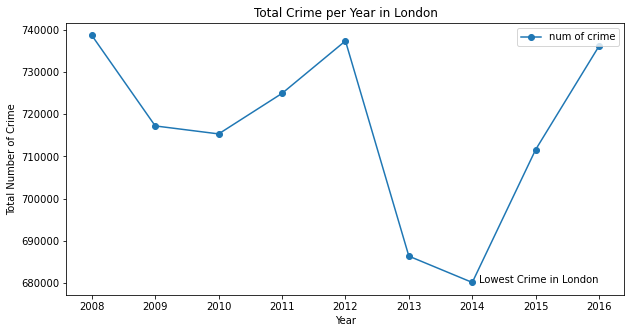

In [15]:
crime_per_year.plot(marker='o' , figsize=(10,5))
plt.title('Total Crime per Year in London')
plt.ylabel('Total Number of Crime')
plt.xlabel('Year')

plt.text(2014.1,680183, 'Lowest Crime in London')

Text(0.5, 1.0, 'Number of Crime in London 2008-2016')

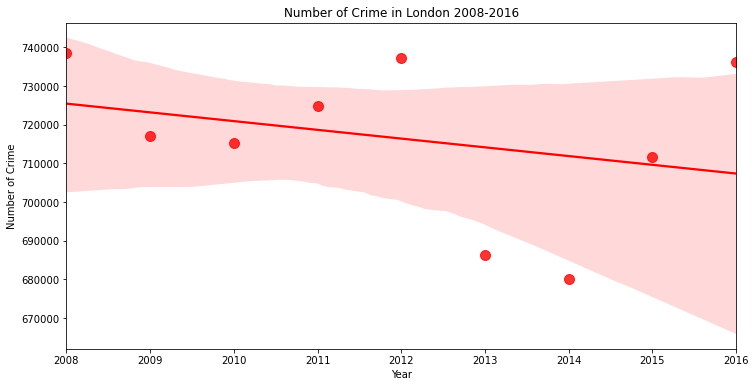

In [81]:
# Scatter Plot
scatter = crime_per_year.reset_index()
plt.figure(figsize=(12,6))
ax =sns.regplot(x='year', y='num of crime', data=scatter, color = 'red', marker = 'o',scatter_kws={'s':100})
ax.set(xlabel='Year', ylabel= 'Number of Crime')
ax.set_title('Number of Crime in London 2008-2016')

In [17]:
# CONCLUSION 1 = London has lowest Crime on 2014
# the crime in london drastically drop from 2012 to 2014, however increase significantly again till 2016

In [18]:
#Crime on 2016 using Histogram

crime_2016=df[(df.year == 2016)]
crime_2016= crime_2016.groupby(['location']).sum()
crime_2016.drop(columns={'year','month'}, inplace=True)
crime_2016.head()

,num of crime
location,
Barking and Dagenham,16741
Barnet,24684
Bexley,12840
Brent,26693
Bromley,20164


Text(0.5, 0, 'Number of Crime')

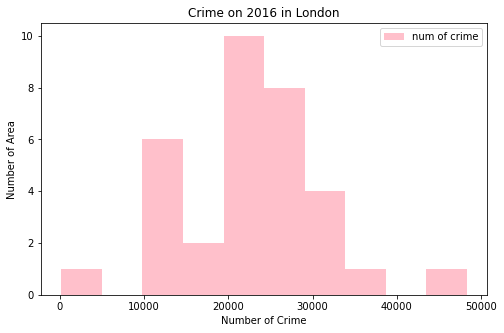

In [98]:
count, bin_edges = np.histogram(crime_2016)
crime_2016.plot(kind='hist',figsize=(8,5),color='pink')
plt.title('Crime on 2016 in London')
plt.ylabel('Number of Area')
plt.xlabel('Number of Crime')

Text(0.5, 0, 'Month')

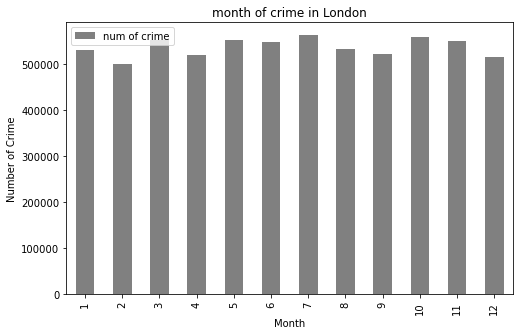

In [94]:
#Month of Crime in London

month_of_crime=df.groupby(['month']).sum()
month_of_crime.drop(columns='year', inplace=True)

month_of_crime.plot(kind='bar',figsize=(8,5), color='gray')
plt.title('month of crime in London')
plt.ylabel('Number of Crime')
plt.xlabel('Month')

In [20]:
# Total Crime based on Major Category

major_crime=df.groupby(['major_category']).sum()
major_crime.drop(columns={'year','month'}, inplace=True)
major_crime.sort_values('num of crime',inplace=True)

In [21]:
major_crime['percentage'] = (major_crime['num of crime']/major_crime['num of crime'].sum())*100 #add percentage of major category

In [22]:
major_crime.head(2)

,num of crime,percentage
major_category,,
Sexual Offences,1273,0.019743
Fraud or Forgery,5325,0.082587


Text(0.5, 1.0, 'Crime as per Major Category')

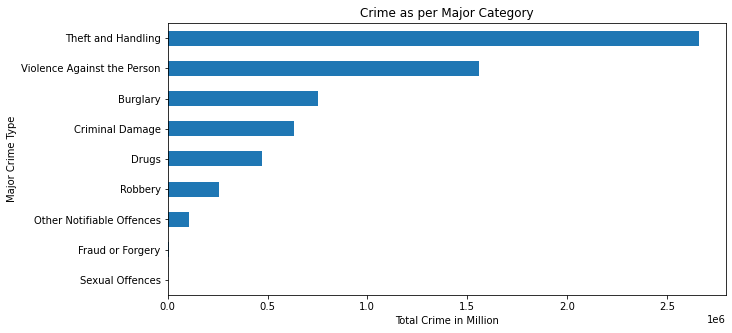

In [23]:
#BAR CHART of Major Crime in London
major_crime['num of crime'].plot(kind='barh',figsize=(10,5))
plt.xlabel('Total Crime in Million')
plt.ylabel('Major Crime Type')
plt.title ('Crime as per Major Category')

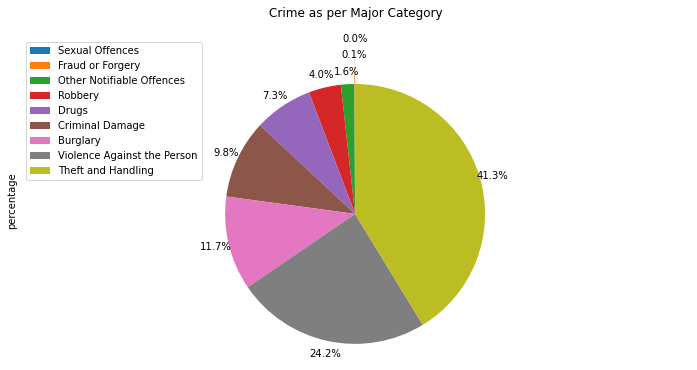

In [24]:
#PIE CHART of Major Crime in London

major_crime['percentage'].plot(kind='pie',figsize=(12,6),autopct='%1.1f%%',startangle=90, labels=None,pctdistance=1.1,
                 explode=[0.25,0.13,0,0,0,0,0,0,0])


plt.title ('Crime as per Major Category', pad=20) # I use pad to increse the distance between title and the chart
plt.axis('equal')

#add legend
plt.legend(labels=major_crime.index, loc='upper left')

In [110]:
# Total Crime based on Minor Category

minor_crime=df.groupby(['minor_category']).sum()
minor_crime.drop(columns={'year','month'}, inplace=True)
minor_crime.sort_values('num of crime',inplace=True)
minor_crime['percentage'] = (minor_crime['num of crime']/minor_crime['num of crime'].sum())*100 #add percentage of minor category

In [114]:
len(df['minor_category'].unique())
#Check unique value in minor category for "explode" purpose of pie chart

32

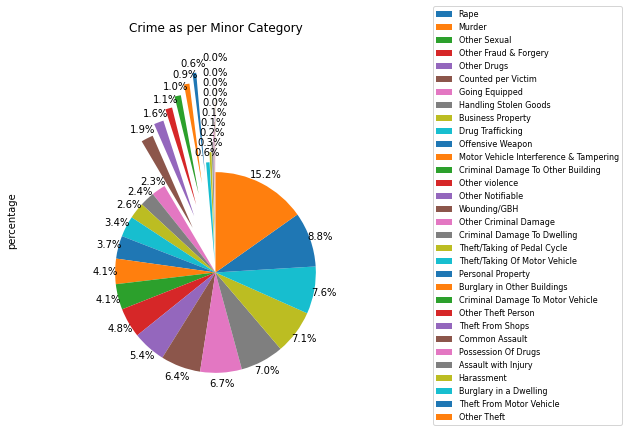

In [137]:
#PIE CHART of Minor Category in London

minor_crime['percentage'].plot(kind='pie',figsize=(12,6),autopct='%1.1f%%',startangle=90, labels=None,pctdistance=1.1,
                 explode=[1.05,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,1,0.9,0.8,0.7,0.6,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])


plt.title ('Crime as per Minor Category', pad=20) 
plt.axis('equal')

#add legend
# plt.legend(labels=minor_crime.index, loc='right')

plt.legend(labels=minor_crime.index, bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=8, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

In [25]:
# Box Plot of Total Crime based on Minor Category

In [26]:
minor_category=df.groupby(['minor_category']).sum()
minor_category.drop(columns={'year','month'}, inplace=True)
minor_category.sort_values('num of crime',ascending=False, inplace=True)

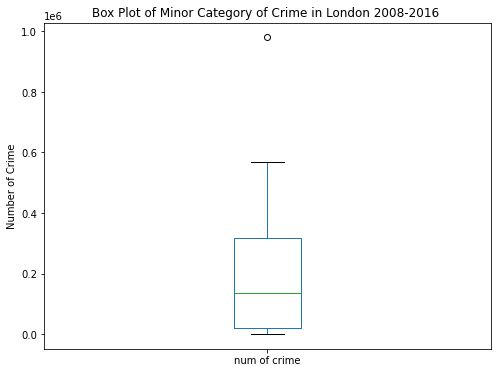

In [27]:
minor_category.plot(kind='box',figsize=(8,6))
plt.title('Box Plot of Minor Category of Crime in London 2008-2016 ')
plt.ylabel('Number of Crime')
plt.show()

In [28]:
# Conclusion 2: 
# Each Month the crime number is quite the same 
# The Most Crime in London is Theft and Handling followed by Violence Against the Person that cover more than 50% of total crime
# Murder is the higest crime according to minor category

In [29]:
# Total Crime based on location (borough)

In [30]:
print ('Total Crime in London') 
print (df['num of crime'].sum()) 

Total Crime in London
6447758


In [31]:
# WORDCLOUDS for Major Crime in London

In [32]:
crime_bylocation= df.groupby(['location']).sum()
crime_bylocation.drop(columns={'year','month'}, inplace=True) #delete column year and month
crime_bylocation.sort_values('num of crime',ascending= False, inplace=True)     #sort based on number of crime

In [33]:
#Total Crime for each location from 2008-2016
crime_bylocation.head()

,num of crime
location,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [34]:
# listlocation=df.set_index('location').to_dict()['num of crime'] #convert dataframe into dictionary with its number of crime
listlocation=crime_bylocation.to_dict()['num of crime']

In [35]:
# stopwords=set(STOPWORDS)
wc= WordCloud( background_color = 'black',max_words=7000000).generate_from_frequencies(listlocation)
#I'm using generate from frequencies

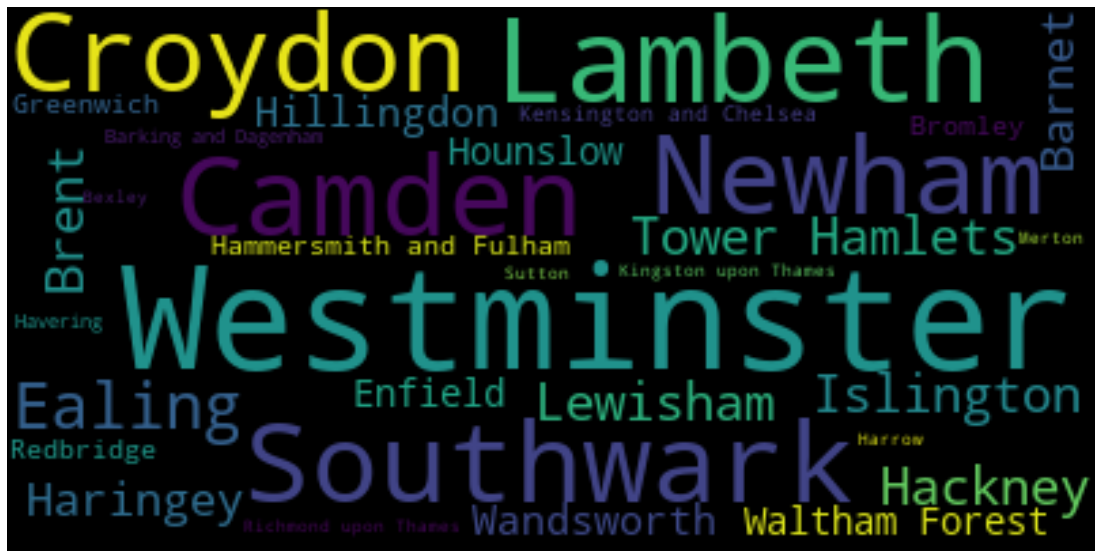

In [36]:
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/naavsaa/Hactiv8-Python/image/crime.png',"UK.png")

('UK.png', <http.client.HTTPMessage at 0x1f121240be0>)

In [38]:
london_mask=np.array(Image.open('UK.png'))

In [39]:
ld=Image.open('UK.png')
# ld.show()

In [40]:
maskwc= WordCloud( background_color = 'gray',max_words=7000000, mask=london_mask).generate_from_frequencies(listlocation)

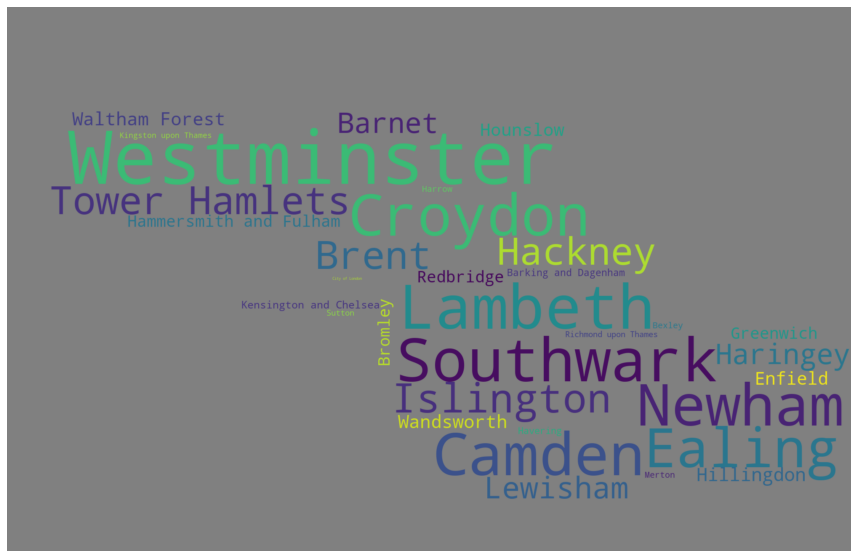

In [41]:
fig=plt.figure(figsize=(20, 10))
plt.imshow(maskwc, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# Conclusion 3: 
# From Word Cloud we can see Westminster is location with higest crime shown by biggest word followed by Lambeth ,Southwark ,Camden and Newham

In [43]:
# AREA PLOT of Major Crime in London

In [44]:
crime_area=df.groupby(['location','year']).sum().reset_index()
crime_area.drop(columns={'month'}, inplace=True)
crime_area.sort_values('num of crime',ascending=True, inplace=True)

In [45]:
crime_area = crime_area[(crime_area["location"].isin(['Westminster','Lambeth','Southwark','Camden','Newham']))]
#Looking only top 5 area with highest crime

In [46]:
crime_area.head()

,location,year,num of crime
51,Camden,2014,27198
218,Newham,2013,27577
216,Newham,2011,27978
219,Newham,2014,28005
50,Camden,2013,28435


In [47]:
crime_area_top5=crime_area.pivot(index='year', columns='location', values='num of crime')
#transpose location into row

In [48]:
crime_area_top5.head()

location,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226


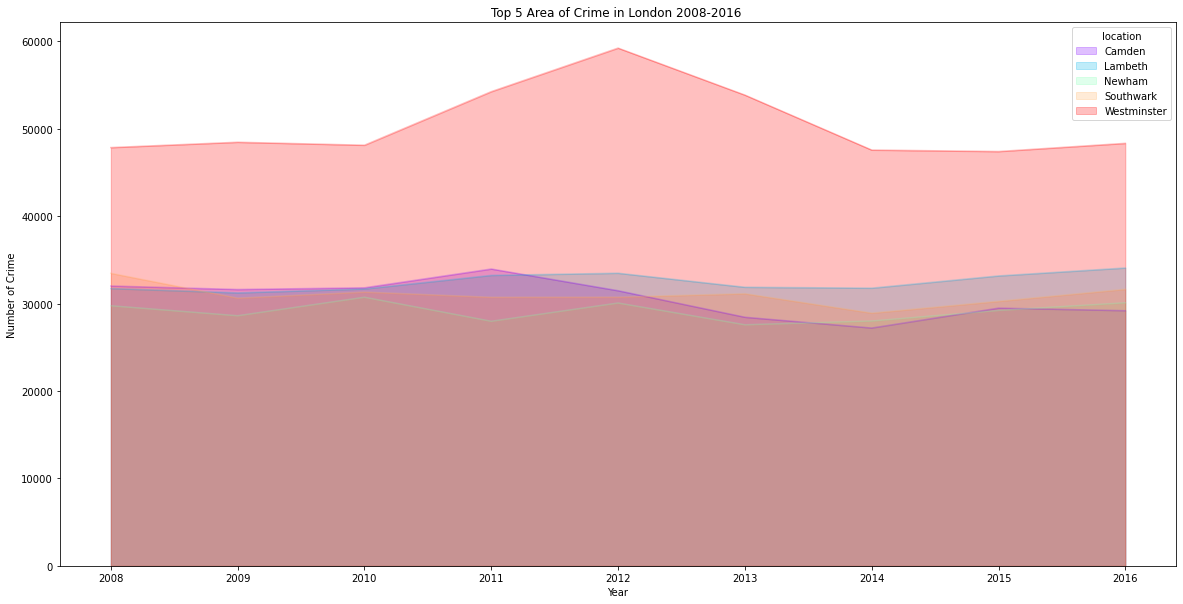

In [49]:
crime_area_top5.index=crime_area_top5.index.map(int)
crime_area_top5.plot(kind='area',alpha=0.25, stacked=False, figsize=(20,10), colormap='rainbow')
plt.title('Top 5 Area of Crime in London 2008-2016 ')
plt.ylabel('Number of Crime')
plt.xlabel('Year')
plt.show()

Text(0.5, 1.0, 'Number of Crime in Camden Area 2008-2016')

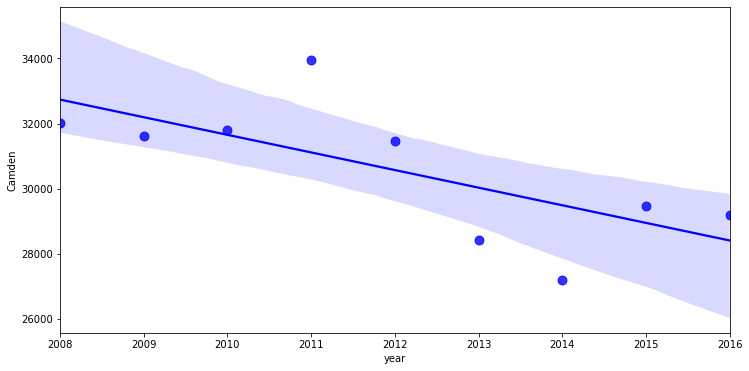

In [80]:
# Looking at Two of Top 5 Area
# Crime in Camden Area 2008-2016
scatter_camden = crime_area_top5.reset_index()
plt.figure(figsize=(12,6))
camden_scatter =sns.regplot(x='year', y='Camden', data=scatter_camden, color = 'blue', marker = 'o',scatter_kws={'s':80})
ax.set(xlabel='Year', ylabel= 'Number of Crime')
ax.set_title('Number of Crime in Camden Area 2008-2016')

Text(0.5, 1.0, 'Number of Crime in Lambeth Area 2008-2016')

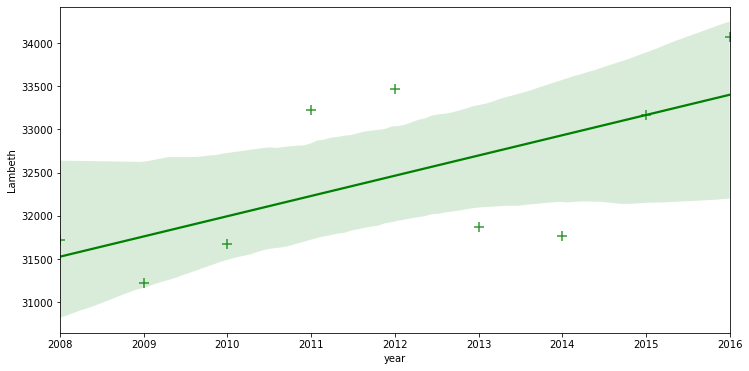

In [77]:
# Crime in Lambeth Area 2008-2016
scatter_lambeth = crime_area_top5.reset_index()
plt.figure(figsize=(12,6))
lambeth_scatter =sns.regplot(x='year', y='Lambeth', data=scatter_lambeth, color = 'green',marker = '+', scatter_kws={'s':100})
ax.set(xlabel='Year', ylabel= 'Number of Crime')
ax.set_title('Number of Crime in Lambeth Area 2008-2016')

In [50]:
# Conclusion 4: Westminster is the area that always has higest number of crime from 2008 to 2016
# While Number of crime in Camden is reducing over time, it is increasing in Lamden Area

In [51]:
# Crime Location with Folium

geolocator = Nominatim(user_agent="hactiv8")  #Check London longitude and latitude
city ="London"
country ="UK"
london = geolocator.geocode(city+','+ country)
print("latitude is :" ,london.latitude,"\nlongtitude is:" ,london.longitude)

latitude is : 51.5073219 
longtitude is: -0.1276474


In [52]:
london_map = folium.Map(location= [london.latitude, london.longitude], zoom_start=10, tiles='stamen toner')

In [53]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [54]:
crime_map= crime_bylocation.reset_index()
crime_map['address'] = crime_map['location'].apply(geocode)
crime_map['Lat'] = crime_map['address'].apply(lambda x: x.latitude if x else None)
crime_map['Lon'] = crime_map['address'].apply(lambda x: x.longitude if x else None)

# use geopy and add latitude and longitude into the dataset

In [55]:
crime_map.head()

,location,num of crime,address,Lat,Lon
0,Westminster,455028,"(Westminster, Millbank, City of Westminster, L...",51.500444,-0.126540
1,Lambeth,292178,"(Lambeth, London Borough of Lambeth, London, G...",51.501301,-0.117287
2,Southwark,278809,"(Southwark, London Borough of Southwark, Londo...",51.502922,-0.103458
3,Camden,275147,"(Camden, Camden County, New Jersey, United Sta...",39.944840,-75.119891
4,Newham,262024,"(London Borough of Newham, London, Greater Lon...",51.530000,0.029318


In [56]:
for i in range(0,len(crime_map)):
   folium.Marker(
      location=[crime_map.iloc[i]['Lat'], crime_map.iloc[i]['Lon']],
      popup=crime_map.iloc[i]['location'],
   ).add_to(london_map)

london_map

In [57]:
# Conclusion 5:
# Crime in London is seems to distribute evently, however almost no crime in the southest part of london

In [ ]:
#### END #####